In [1]:
# import the necessary packages
import numpy as np
from numpy import linalg as LA

from matplotlib import pyplot as plt

# to display directly in the notebook
%matplotlib inline 

plt.rcParams['figure.figsize'] = [15.0, 15.0]
#plt.rcParams['image.cmap'] = 'gray' 

# 1. Données artificielles et réelles 

### Q 1.1 Génération aléatoire :

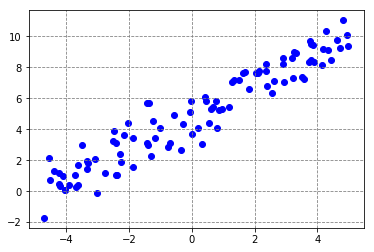

In [2]:
def gen_linear (a, b, eps, nbex):
    
    X = np.random.uniform(-5,5,nbex)
    X.reshape(-1,1)
    
    eps1 = np.random.normal(0, eps, nbex)
    
    Y = a*X + b + eps1
    return [X, Y]

def question11 ():
    a = 1
    b = 5
    eps = 1
    nbex = 100
    
    # Plot outputs
    X , Y = gen_linear (a, b, eps, nbex)
    plt . figure ()
    plt . scatter (X , Y, color='blue')
    plt.grid(color='gray', linestyle='dashed')     
    plt.show()  
    
question11()

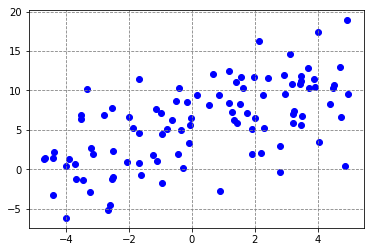

In [3]:
def gen_linear_general (a, b, eps, nbex, d):
    
    X = np.random.uniform(-5,5,[nbex, d])
    
    eps1 = np.random.normal(0, eps, nbex)
    eps1.reshape(-1,1)
    
    Y = np.dot(X, a.T) + b + eps1
    return [X, Y]

def question11_general ():
    d = 3
    a = np.ones(d)
    a.reshape(-1,1)
    
    b = 5
    eps = 1
    nbex = 100
    
    # Plot outputs
    X , Y = gen_linear_general (a, b, eps, nbex, d)
    plt . figure ()
    plt . scatter (X[:,1] , Y, color='blue' )
    plt.grid(color='gray', linestyle='dashed') 
    plt.show()
    
question11_general ()

### Q 1.2 Données réelles :

In [4]:
# Descriptions des attributs :
# 1 - crim : per capita crime rate by town .
# 2 - zone : proportion of residential land zoned for lots over 25 ,000 sq . ft .
# 3 - indus : proportion of non - retail business acres per town .
# 4 - chas : Charles River dummy variable (= 1 if tract bounds river ; 0 otherwise ).
# 5 - nox : nitrogen oxides concentration ( parts per 10 million ).
# 6 - room : average number of rooms per dwelling .
# 7 - age : proportion of owner - occupied units built prior to 1940.
# 8 - empldist : weighted mean of distances to five Boston employment centres .
# 9 - radiushighway : index of accessibility to radial highways .
# 10 - taxproperty : full - value property - tax rate per $10 ,000.
# 11 - teacherratio : pupil - teacher ratio by town .
# 12 - blackprct : 1000( Bk - 0.63)^2 where Bk is the proportion of blacks by town .
# 13 - lowerstatus : lower status of the population ( percent ).
# Y - medianvalue : ( target value ) median value of owner - occupied homes in $1000s .

def read_file ( fn ):
    with open ( fn ) as f :
        names = f . readline ()
        X = np . array ([[ float ( x ) for x in l . strip (). split (" ")] for l in f . readlines ()])
    return X [: ,: -1] , X [: , -1]. reshape ( -1)

In [5]:
titles = ['Crim', 'Zone', 'Indus', 'Chas', 'Nox', 'Room', 'Age',
          'Empldist', 'Radiushighway', 'Taxproperty', 'Teacherratio', 
          'Blackprct', 'Lowerstatus']

def plot_nuages (X, m = 3):
    
    plt.rcParams['figure.figsize'] = [25.0, 25.0]
    
    plt.figure()
    
    n = X.shape[1]
    
    for i in range(m):
        for j in range(m):
            plt.subplot(n ,n ,j+1)
            
            label_cor = round(np.corrcoef(X[:,i], X[:,j])[0, 1],2)
            plt.scatter (X[:,i], X[:,j], label=label_cor)
            #plt.text(-0.06, - 0.06, label_cor , {'color': 'k', 'fontsize': 10})
            
            plt.title(titles[j])
            plt.ylabel(titles[i])
            plt.xticks([]),plt.yticks([])
            plt.legend()
            
        
        plt.show()   


 Crim  : 
	 Esperance :  3.61
	 Variance :  73.84

 Zone  : 
	 Esperance :  11.36
	 Variance :  542.86

 Indus  : 
	 Esperance :  11.14
	 Variance :  46.97

 Chas  : 
	 Esperance :  0.07
	 Variance :  0.06

 Nox  : 
	 Esperance :  0.55
	 Variance :  0.01

 Room  : 
	 Esperance :  6.28
	 Variance :  0.49

 Age  : 
	 Esperance :  68.57
	 Variance :  790.79

 Empldist  : 
	 Esperance :  3.8
	 Variance :  4.43

 Radiushighway  : 
	 Esperance :  9.55
	 Variance :  75.67

 Taxproperty  : 
	 Esperance :  408.24
	 Variance :  28348.62

 Teacherratio  : 
	 Esperance :  18.46
	 Variance :  4.68

 Blackprct  : 
	 Esperance :  356.67
	 Variance :  8318.28

 Lowerstatus  : 
	 Esperance :  12.65
	 Variance :  50.89


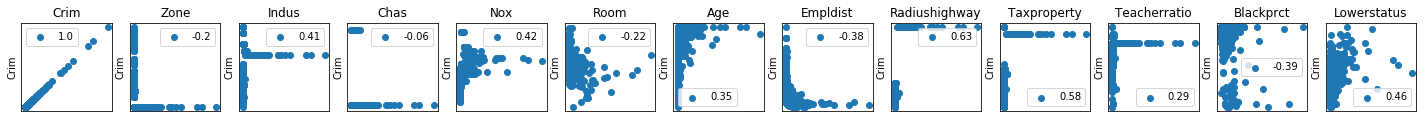

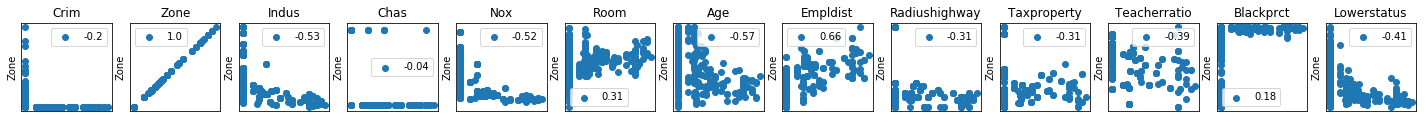

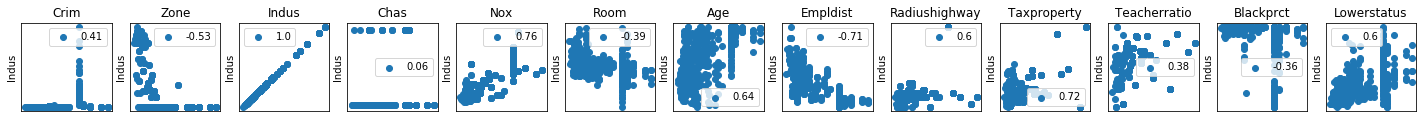

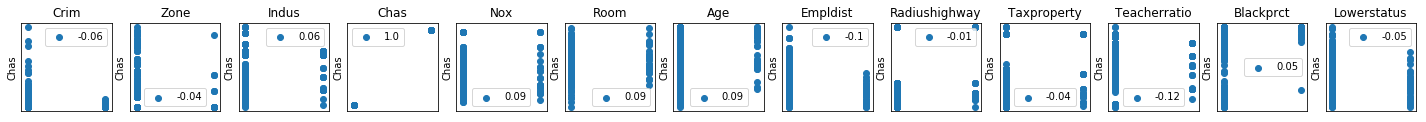

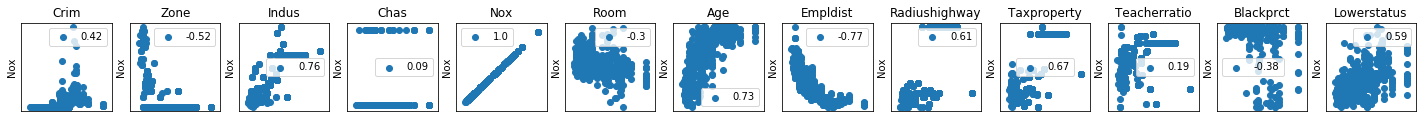

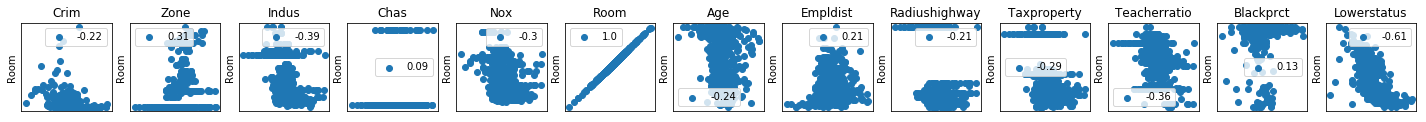

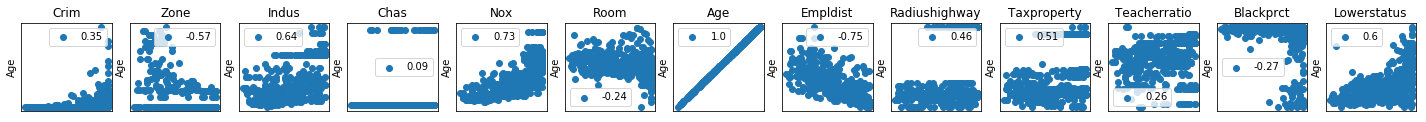

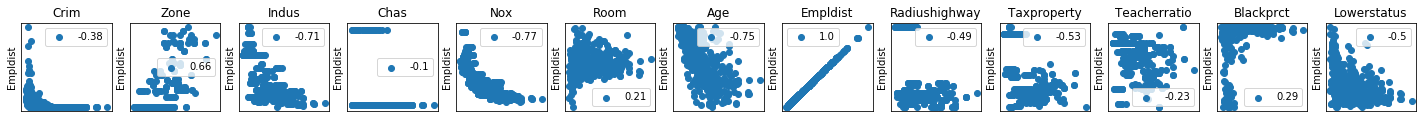

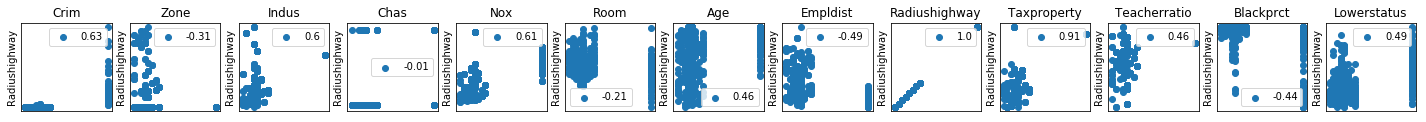

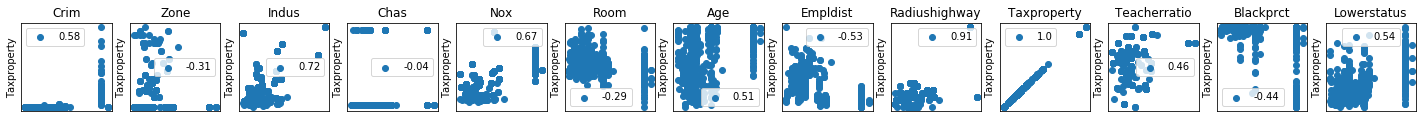

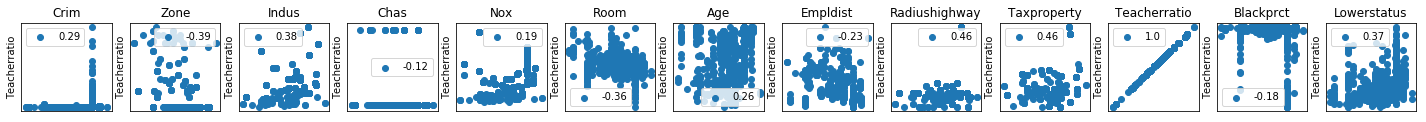

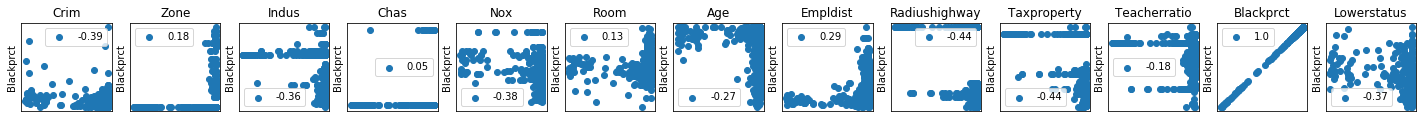

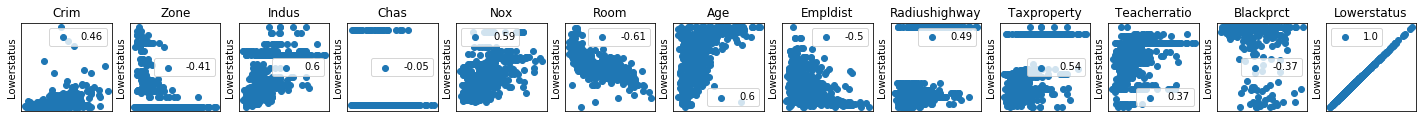

In [6]:
def question12 (m=3):
    X_BH, Y_BH = read_file ('housing.csv')
    
    for i in range(X_BH.shape[1]):
        print("\n", titles[i], " : ")
        print("\t Esperance : ", round(np.mean(X_BH[:,i]),2))
        print("\t Variance : ", round(np.std(X_BH[:,i])**2,2))
    
    plot_nuages (X_BH, m)
    
    return [X_BH, Y_BH]
    
X_BH, Y_BH = question12 (13)

On remarque que les variables les plus corrélées sont (Indus, Nox) avec $R=0.76$, (Indus, Empldist) avec $R=-0.71$, (Indus, Taxproperty) avec $R=0.72$, (Nox, Age) avec $R=0.73$, (Empldist, Age) avec $R=-0.75$, (nox, Empldit) avec $R=-0.77$, (Radiushighway, Taxproperty) avec $R=0.91$.

# 2 Régression linéaire

La régression linéaire suppose une relation linéaire entre la valeur à prédire - l’étiquette - et les différentes dimensions. La forme générique est donc $$ f_w(X) = w_0*1 + \sum_{i=1}^{d} w_i x_i $$ avec $ w \in R^{d+1}$ le vecteur de
paramètres.

$$ \hat{Y} = f_w(X) = Xw $$

$$ L(X, Y, w) = \frac{1}{2d} \sum_{i=1}^{d} (y_i  - w^T x_i)^2 = \frac{1}{2d}||Y - \hat{Y}||_{2}^{2}  = \frac{1}{2d} (Y - Xw)^T(Y - Xw)
$$ 

$$
\frac{\partial L}{\partial w} = \frac{1}{2d} (-2X^TY+2X^TXw) 
$$

$$
\frac{\partial L}{\partial w} = 0 <=> w = (X^TX)^{-1}X^TY
$$


### Q 2.1 (Préambule)

In [7]:
def predict (w,X):
    X_dot = np.ones([X.shape[0], X.shape[1]+1])
    X_dot[:,1:] = X
    
    return np.dot(X_dot, w)

def mse(yhat,y):
    return 0.5*np.mean((y-yhat)**2)

def regress(X,Y):
    X_dot = np.ones([X.shape[0], X.shape[1]+1])
    X_dot[:,1:] = X
    
    w = np.dot(np.dot(LA.pinv(np.dot(X_dot.T, X_dot)),X_dot.T),Y)
    
    return w   

### Q 2.2 Données artificielles

In [8]:
# Evolution de l’erreur moyenne des moindres carrés en fonction du nombre de données utilisées
def eval_data_art_N (a, b, d, eps, nbex): 
    X_art , Y_art = gen_linear_general (a, b, eps, nbex, d)
    AB = np.concatenate((np.array([b]), a), axis=0)
    
    result_y = np.zeros(nbex)
    result_w = np.zeros(nbex)
    grille = np.arange(0, nbex, 1)
    
    for n in grille:
        w_art = regress(X_art[0:n, :] , Y_art[0:n])
        result_y[n] = mse(predict(w_art, X_art[0:n, :]), Y_art[0:n])
        result_w[n] = mse(w_art, AB)
        
    return [grille, result_y, result_w]

# Evolution de l’erreur moyenne des  moindres carrés en fonction du bruit
def eval_data_art_eps (a, b, d, eps, nbex): 
    
    grille = np.arange(0.1, eps+ 0.1, 0.1)
    result_y = np.zeros(grille.size)
    result_w = np.zeros(grille.size)
    
    AB = np.concatenate((np.array([b]), a), axis=0)
    
    for i in range(grille.size):
        X_art , Y_art = gen_linear_general (a, b, grille[i], nbex, d)
        w_art_eps = regress(X_art, Y_art)
        #print('\n', w_art_eps, AB)
        
        result_y[i] = mse(predict(w_art_eps, X_art), Y_art)
        result_w[i] = mse(w_art_eps, AB)
    
    
    return [grille, result_y, result_w]

C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


w_predict =  [5.03498522 0.98482875 1.02216258 1.0138508 ]


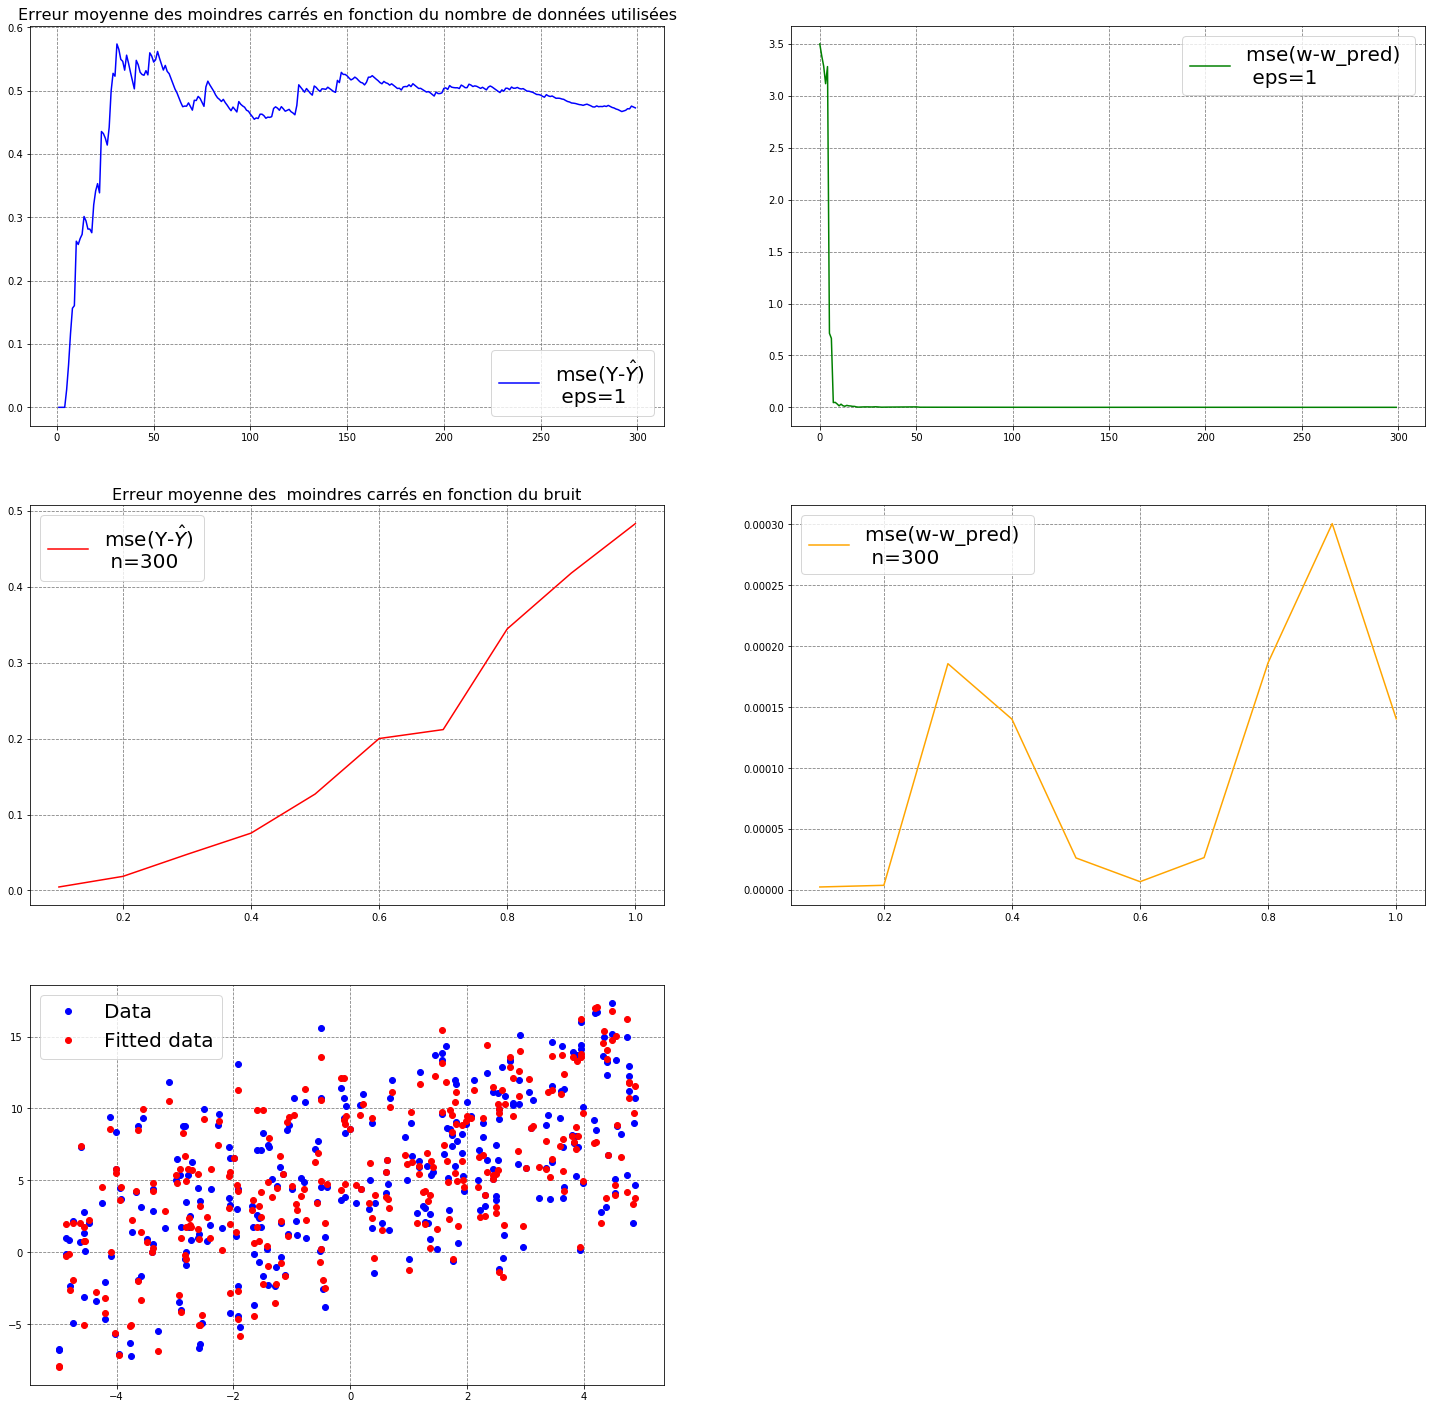

In [9]:
def question221 (a = np.ones(3)):
    a.reshape(-1,1)
        
    d = a.shape[0]
    b = 5
    
    eps = 1
    nbex = 300
    
    grille_N, eval_N_Y, eval_N_w = eval_data_art_N (a, b, d, eps, nbex)
    
    grille_eps, eval_eps_Y, eval_eps_w = eval_data_art_eps (a, b, d, eps, nbex)
    
    
    ax1 = plt.subplot(321)
    ax1.plot(grille_N , eval_N_Y, color='blue', label='mse(Y-$\hat Y$) \n eps=1')
    ax1.set_title('Erreur moyenne des moindres carrés en fonction du nombre de données utilisées', fontsize = 16)
    ax1.legend(fontsize = 20)
    ax1.grid(color='gray', linestyle='dashed')
    
    ax12 = plt.subplot(322)
    ax12.plot(grille_N , eval_N_w, color='green', label='mse(w-w_pred) \n eps=1')
    ax12.legend(fontsize = 20)
    ax12.grid(color='gray', linestyle='dashed')
    #ax12.set_title('Erreur moyenne des moindres carrés en fonction du nombre de données utilisées')
    
    ax2 = plt.subplot(323)
    ax2.plot(grille_eps , eval_eps_Y, color='red', label='mse(Y-$\hat Y$) \n n=300' )
    ax2.set_title('Erreur moyenne des  moindres carrés en fonction du bruit', fontsize = 16)
    ax2.legend(fontsize = 20)
    ax2.grid(color='gray', linestyle='dashed')
    
    ax22 = plt.subplot(324)
    ax22.plot(grille_eps , eval_eps_w, color='orange', label='mse(w-w_pred) \n n=300' )
    #ax22.set_title('Erreur moyenne des  moindres carrés en fonction du bruit')
    ax22.legend(fontsize = 20)
    ax22.grid(color='gray', linestyle='dashed')
    
    X_art , Y_art = gen_linear_general (a, b, eps, nbex, d)
    ax3 = plt.subplot(325)
    ax3.plot(X_art[:,1] , Y_art, 'bo', label='Data')
    ax3.plot(X_art[:,1], predict(regress(X_art, Y_art), X_art) , 'ro', label='Fitted data')
    ax3.legend(fontsize = 20)
    ax3.grid(color='gray', linestyle='dashed')
    
    print('w_predict = ', regress(X_art, Y_art) )
     
    plt.show()

question221 ()

C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


w_predict =  [4.97754665e+00 9.84823241e-01 9.90098179e-01 1.02861927e+00
 4.21700619e-03]


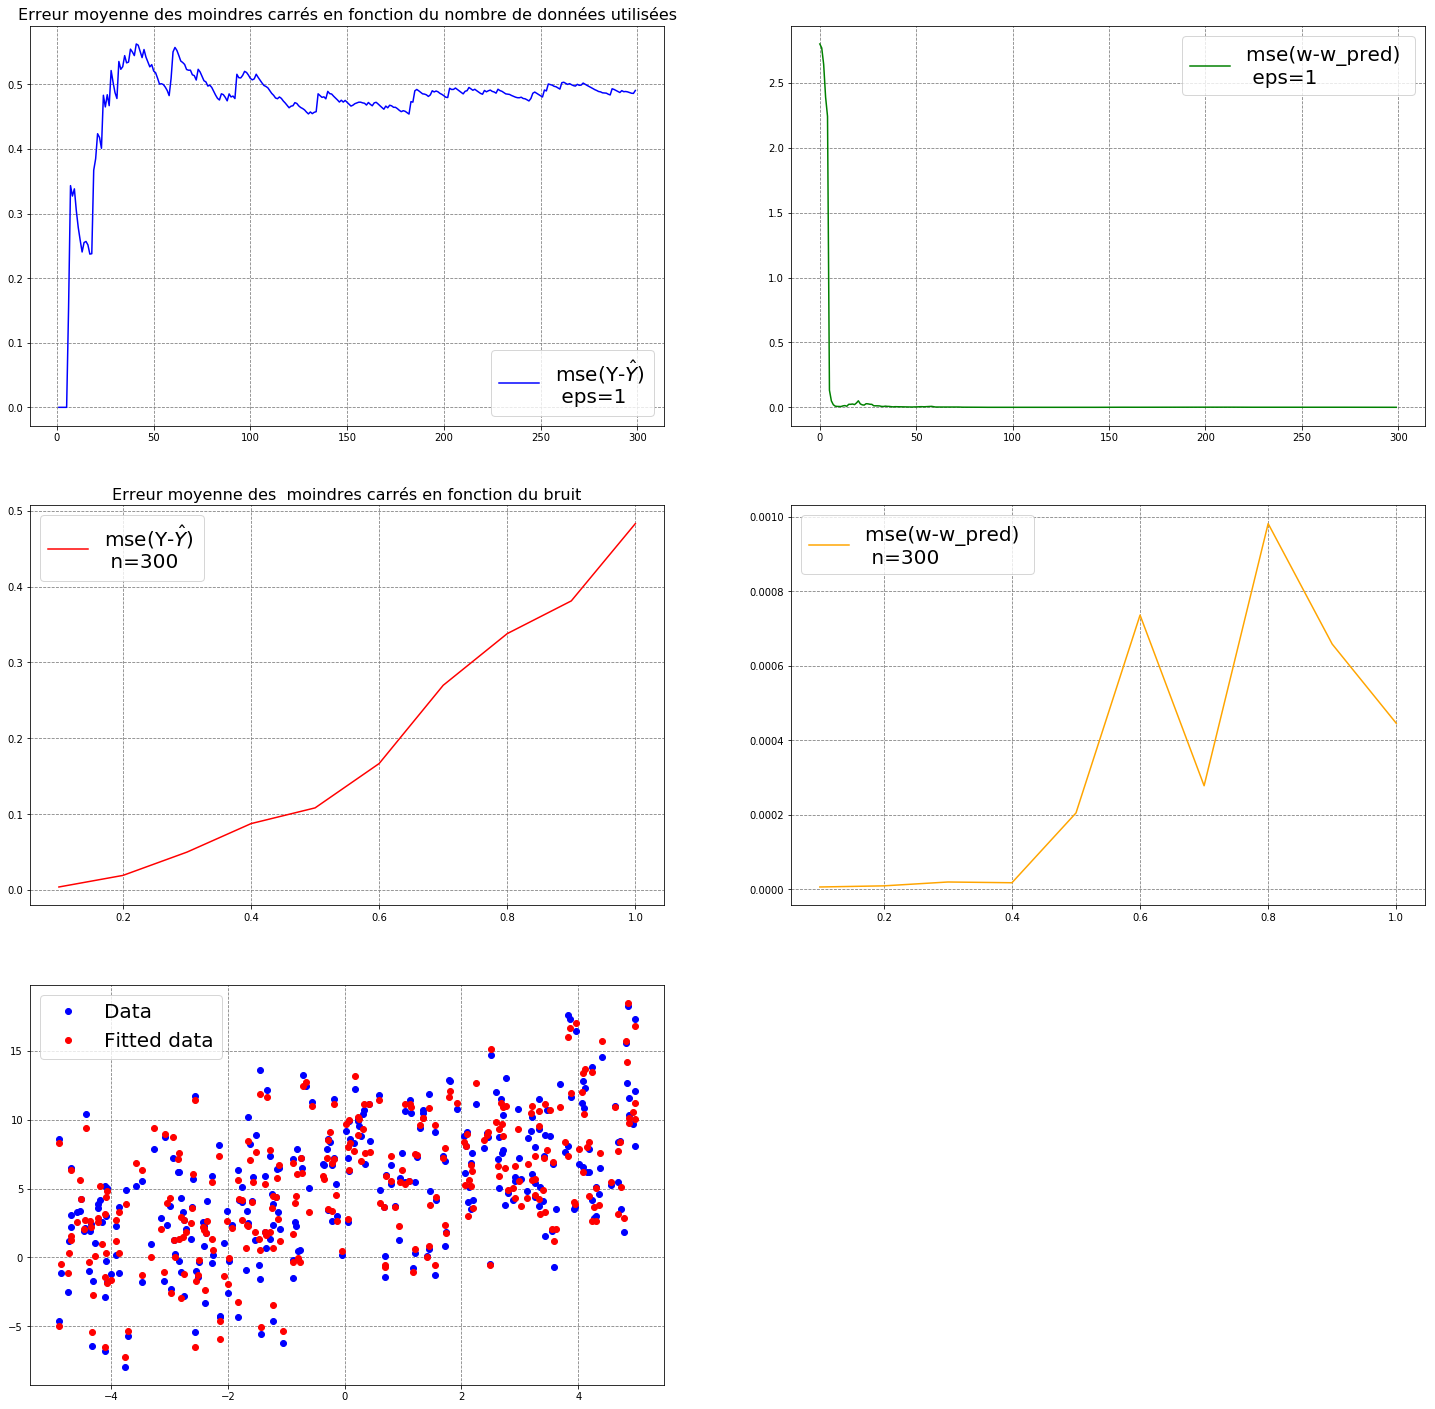

In [10]:
def question222 ():
    a = np.array([1,1,1,0])
    a.reshape(-1,1)
    question221 (a)
    
question222 ()

On constate que l'erreur quadratique entre le $w$ réel et le $w$ prédit est du même ordre de grandeur avec ou sans la dimension supplémentaire de coefficient nulle dans $w$ (erreur de l'ordre de quelques $10^{-4}$). On voit cependant que l'on obtient des valeur du coefficient prédit de l'ordre de $10^{-2}$ au lieu de 0, ce qui forment des erreurs 100 fois plus grandes que l'erreur quadratique moyenne sur les coefficients.

Il est donc plus difficile de prédire les coefficients correspondant à des variables non-corrélés avec Y.

### Q 2.3 Données réelles

In [11]:
def question231 ():
    w_BH = regress(X_BH, Y_BH)
    print('w_BH = ', w_BH )
    print('\n ERROR de Y = ', mse(predict(w_BH, X_BH), Y_BH))
    
    return w_BH
w_BH = question231 ()

w_BH =  [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224641e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]

 ERROR de Y =  10.947415590864603


On va considérer que les poids inférieurs à $10^{-1}$ sont négligeables et correspondent à des variables non-corrélés.
Il s'agit de age, taxproperty et blackprct.
Les variables les plus corrélés à Y sont quant à elles nox puis chas, room et empldist.

#### Q 2.3.2

In [12]:
def question232_0 ():
    X_BH_copy = X_BH.copy()
    X_BH_copy[:, 7] = 10*X_BH[:, 7]
    w_BH_copy = regress(X_BH_copy, Y_BH)
    print('w_BH = ', w_BH_copy )
    print('\n ERROR de Y = ', mse(predict(w_BH_copy, X_BH_copy), Y_BH))
    
    return w_BH_copy
w_BH_copy = question232_0 ()

w_BH =  [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e-01  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]

 ERROR de Y =  10.947415590864603


On constate trivialement que le modèle étant linéaire, si on multiplie les valeurs d'un paramètre par un facteur $\lambda$, le coefficient prévu pour ce paramètre est divisé par $\lambda$. La MSE est donc bien évidemment la même.

On ne peut donc pas se baser sur l'ordre de grandeur d'un coefficient pour en déduire la corrélation de Y avec le paramètre correspondant. Les conclusions la question précédente ne sont donc pas fondées.

On sera donc tenté de normaliser les valeurs de chaque paramètre avant de s'oser à une interprétation des résultats.

In [13]:
def pre_trait (X, means=None, stds=None):
    if means is None :
        means = X.mean(axis=0)
    if stds is None :
        stds = X.std(axis=0)
        
    result = X / stds - means
    
    return [means, stds, result]

means, stds, X_BH_copy = pre_trait(X_BH)

w_BH_copy = regress(X_BH_copy, Y_BH)
print(' w_BH = ', w_BH_copy )
print('\n ERROR de Y = ', mse(predict(w_BH_copy, X_BH_copy), Y_BH))

 w_BH =  [-5.52649713e+02 -9.28146065e-01  1.08156863e+00  1.40900006e-01
  6.81739724e-01 -2.05671826e+00  2.67423016e+00  1.94660706e-02
 -3.10404426e+00  2.66221767e+00 -2.07678172e+00 -2.06060666e+00
  8.49268412e-01 -3.74362713e+00]

 ERROR de Y =  10.947415590864612


TODO : MSE

In [14]:
# Evolution de l’erreur moyenne des moindres carrés en fonction du nombre de données utilisées
def eval_data_N (X, Y): 
    n, m = X.shape
    
    grille = np.arange(0, n, 1)
    result = np.zeros(grille.size)
    
    for i in grille:
        w_data = regress(X[0:i, :] , Y[0:i])
        result[i] = mse(predict(w_data, X[0:i, :]), Y[0:i])
        
    return [grille, result]


C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


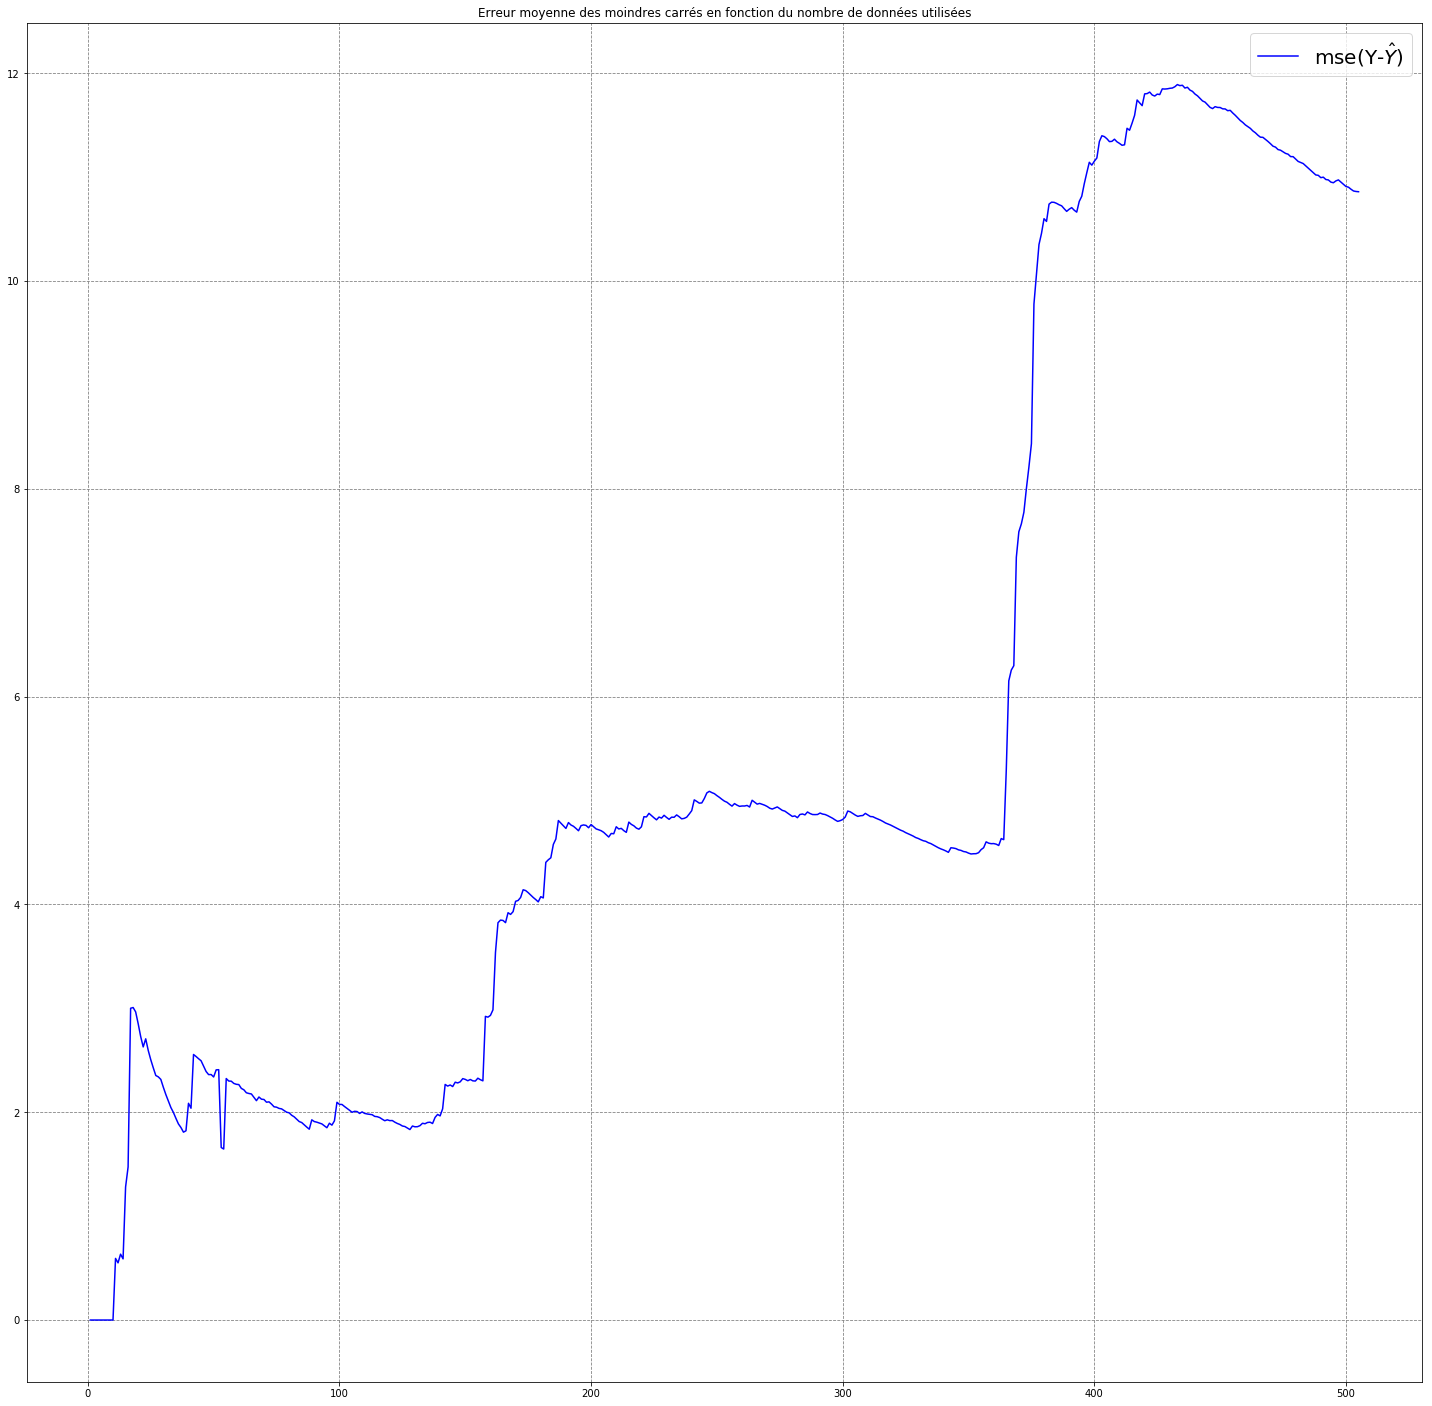

In [15]:
def question232 ():
    
    grille_N , eval_N = eval_data_N (X_BH_copy, Y_BH)
    plt.plot(grille_N , eval_N, color='blue', label='mse(Y-$\hat Y$)')
    plt.title('Erreur moyenne des moindres carrés en fonction du nombre de données utilisées')
    plt.grid(color='gray', linestyle='dashed')
    plt.legend(fontsize = 20)
    
question232 ()

#### Q 2.3.3

 w_BH =  [-129.6195977     0.80403103    0.38477204    0.14998509    0.17230003
   -0.9594355     6.43586158   -1.3778012    -2.00344013    0.27118624
   -1.00500725   -1.46479276    0.72579618   -0.68036643]

 ERROR de Y =  183.0327673325417


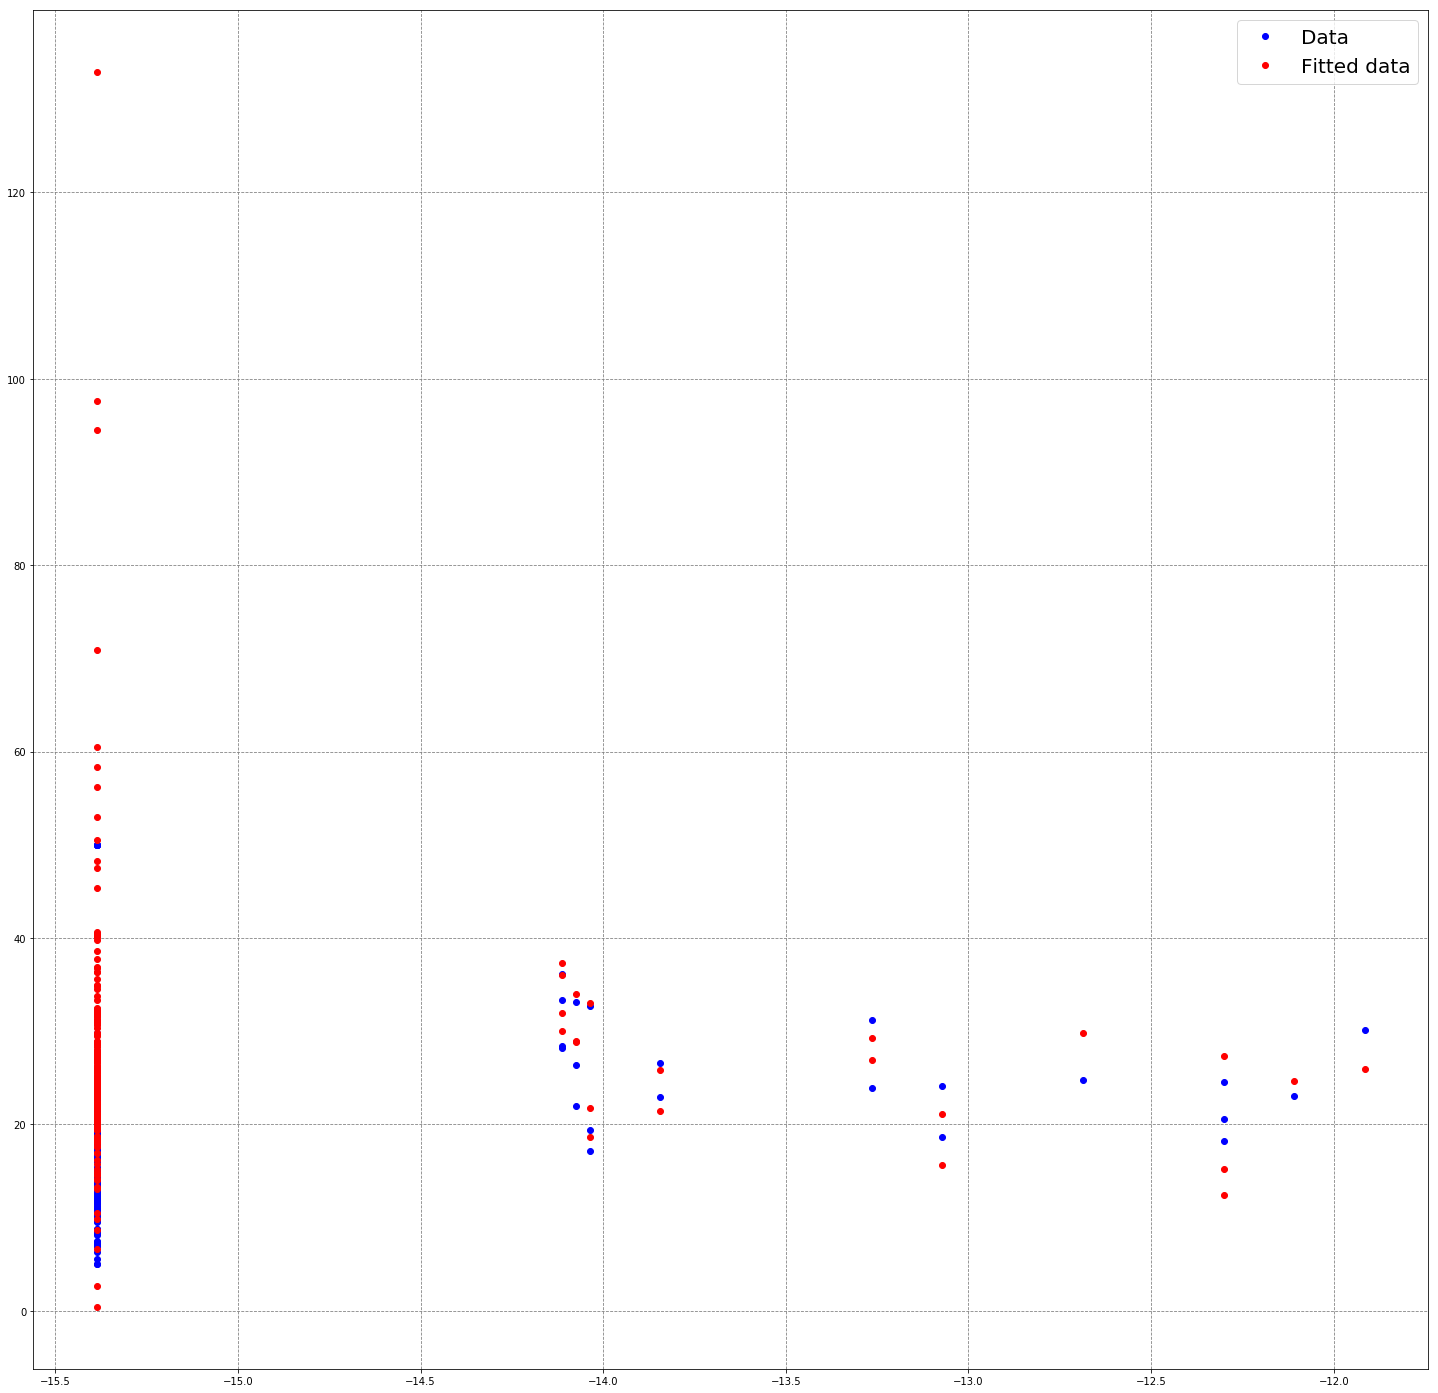

In [31]:
def question233 ():
    X_BH_train = X_BH[0:300,:]
    X_BH_test = X_BH[300:,:]
    
    Y_BH_train = Y_BH[0:300]
    Y_BH_test = Y_BH[300:]
    
    means_train, stds_train, X_BH_train_pre = pre_trait (X_BH_train)
    _, _, X_BH_test_pre = pre_trait(X_BH_test, means_train, stds_train)
    
    w_BH_train = regress(X_BH_train_pre, Y_BH_train)
    print(' w_BH = ', w_BH_train)
    print('\n ERROR de Y = ', mse(predict(w_BH_train, X_BH_test_pre), Y_BH_test))
    
    plt.plot(X_BH_test_pre[:,1] , Y_BH_test, 'bo', label='Data')
    plt.plot(X_BH_test_pre[:,1], predict(w_BH_train, X_BH_test_pre) , 'ro', label='Fitted data')
    plt.legend(fontsize = 20) 
    plt.grid(color='gray', linestyle='dashed') 
    plt.show()
    
    return [X_BH_train_pre, X_BH_test_pre, Y_BH_train, Y_BH_test]
    
X_BH_train_pre, X_BH_test_pre, Y_BH_train, Y_BH_test = question233()

# 3 Ridge Régression


Si la matrice $X^TX$ est non inversible (ou singulière) le problème de régression linéaire n'est pas bien posé et on ne peut pas utiliser la definition de $w$ précédente. On a besoin d'utiliser régularisation :

$$ L(X, Y, w) = \frac{1}{2d}||Y - \hat{Y}||_{2}^{2} + \lambda ||w||_{2}^{2}
$$ 

$$
w = (X^TX + \lambda E)^{-1}X^T Y
$$


In [17]:
def ridge_regress(X,Y,lmb):
    X_dot = np.ones([X.shape[0], X.shape[1]+1])
    X_dot[:,1:] = X
    
    XTX = np.dot(X_dot.T, X_dot)
    I = np.eye(XTX.shape[0])
    
    w = np.dot(np.dot(LA.pinv(XTX + lmb*I),X_dot.T),Y)
    
    return w   

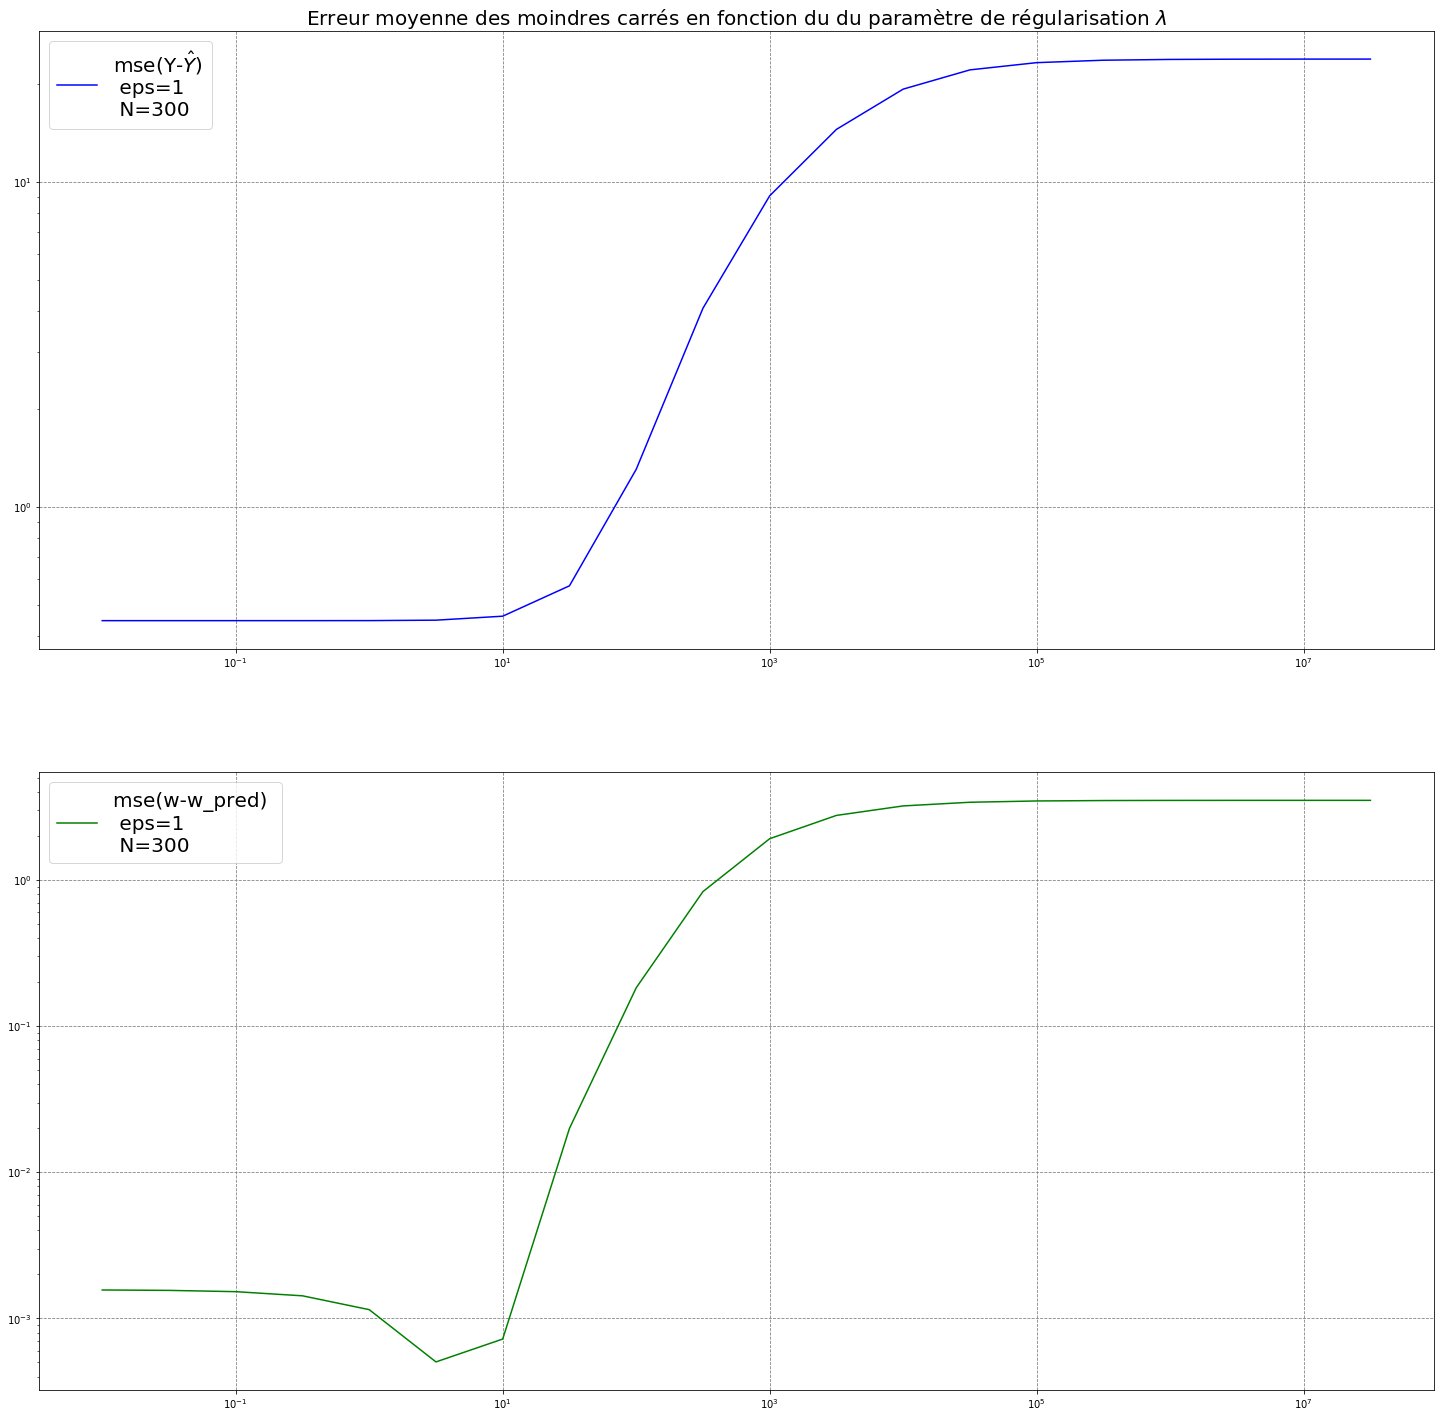

In [18]:
def question32(X_art, Y_art, a=None, b=None):
    if a is not None and b is not None:
        AB = np.concatenate((np.array([b]), a), axis=0)
    
    N = 20
    result_y = np.zeros(N)
    result_w = np.zeros(N)
    grille = [10**(i/2) for i in range(-4, N-4)]
    
    for idx, lmb in enumerate(grille):
        w_art = ridge_regress(X_art , Y_art, lmb)
        result_y[idx] = mse(predict(w_art, X_art), Y_art)
        if a is not None and b is not None:
            result_w[idx] = mse(w_art, AB)
        
    ax1 = plt.subplot(211)
    ax1.plot(grille, result_y, color='blue', label='mse(Y-$\hat Y$) \n eps={} \n N={}'.format(eps, nbex))
    ax1.set_title('Erreur moyenne des moindres carrés en fonction du du paramètre de régularisation $\lambda$', fontsize = 20)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.legend(fontsize = 20)
    ax1.grid(color='gray', linestyle='dashed')
    
    if a is not None and b is not None:
        ax2 = plt.subplot(212)
        ax2.plot(grille, result_w, color='green', label='mse(w-w_pred) \n eps={} \n N={}'.format(eps, nbex))
        ax2.legend(fontsize = 20)
        #ax2.set_title('Erreur moyenne des moindres carrés en fonction du nombre de données utilisées')
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.grid(color='gray', linestyle='dashed')

a = np.ones(3)
d = a.shape[0]
b = 5

eps = 1
nbex = 300

X_art, Y_art = gen_linear_general(a, b, eps, nbex, d)

question32(X_art, Y_art, a, b)

#### Q 3.3

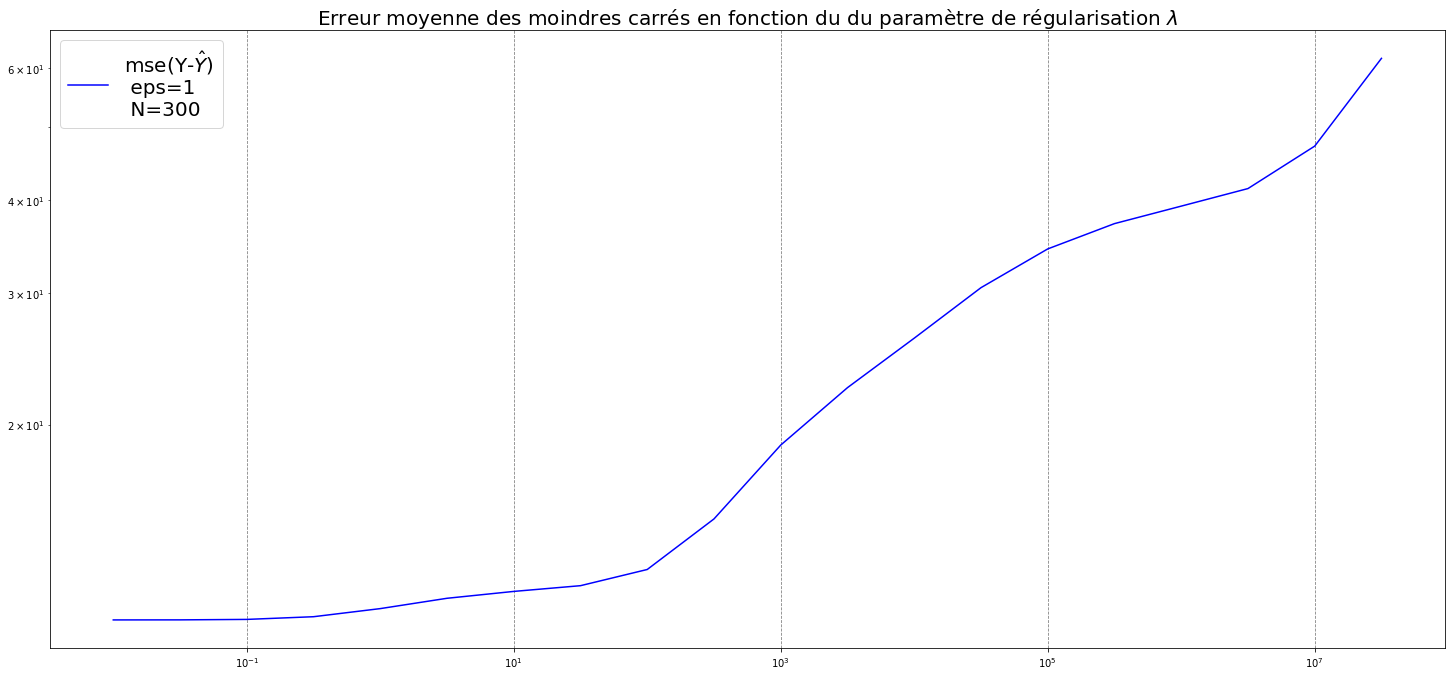

In [19]:
def question33():
    question32(X_BH, Y_BH)

question33()

Contrairement à l'expérimentation avec des données artificielles, on n'observe pas avec les vrais données de transition de phase claire pour $\lambda$ entre 1 et 1000.

# 4 LASSO

Le Lasso remplace la norme $l_2$ au carré par une norme $l_1$. On résout dans ce cas le problème suivant :

$$
\hat f = argmin_w \frac{1}{2n} \sum_{i=1}^{n} ||Xw-Y||_2^2 + \lambda||w||_1 , \ avec \ ||w||_1 = \sum_{i=0}^{d} |w_i|
$$

#### Q 4.1

In [20]:
from sklearn import linear_model
from itertools import cycle

In [21]:
def question41():
    n_alphas = 400
    alphas = np.logspace(-2, 2, n_alphas)
    clf_l = linear_model.Lasso(fit_intercept=True)

    coefs_l = []
    coefs_r = []
    for a in alphas:
        # Lasso
        clf_l.set_params(alpha=a)
        clf_l.fit(X_BH_train_pre, Y_BH_train)
        coefs_l.append(clf_l.coef_)

        # Ridge
        coefs_r.append(ridge_regress(X_BH_train_pre, Y_BH_train,a))
    return [alphas, coefs_l, coefs_r, clf_l]

alphas, coefs_l, coefs_r, clf_l  = question41()

C:\Users\13_Vi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


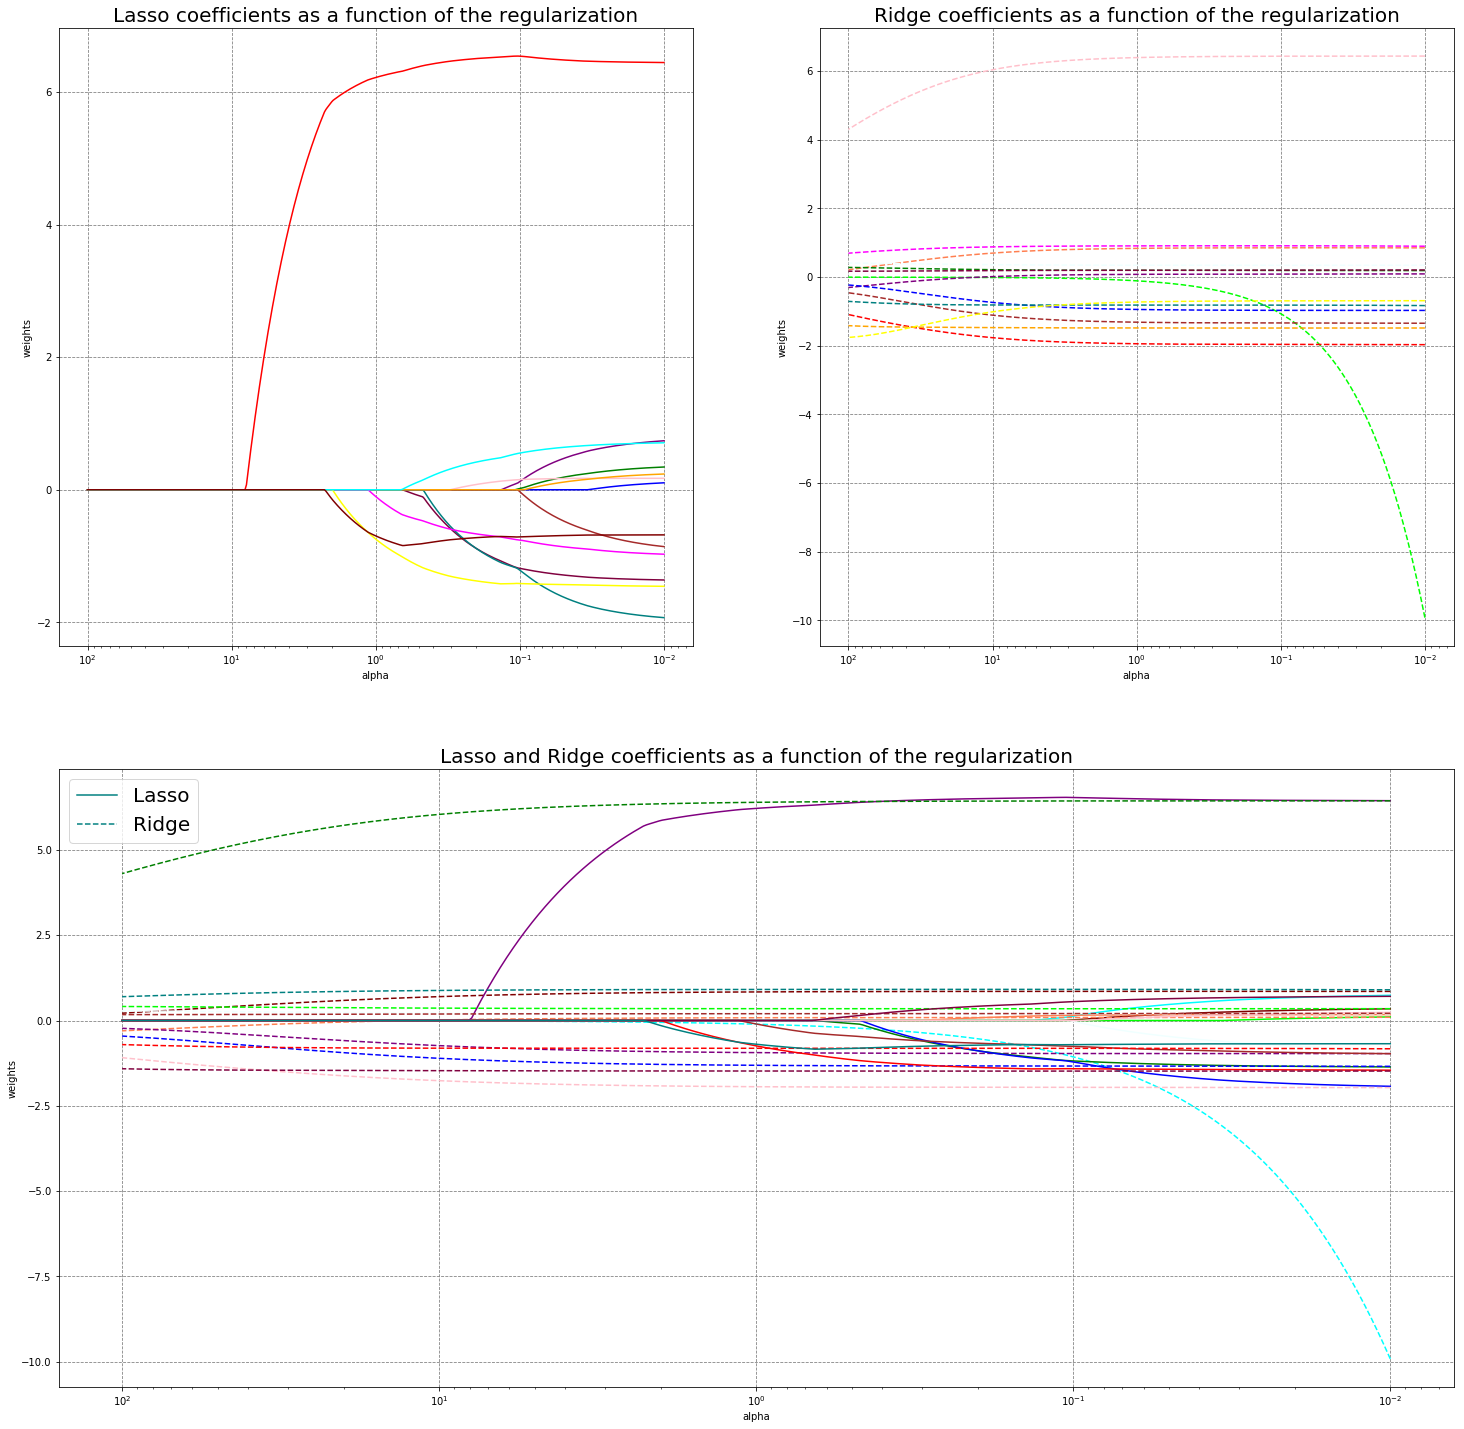

In [22]:
def question41_visualisation():
    ax = plt.gca()

    colors = cycle(['purple', 'green', 'blue', 'pink', 'brown', 'red', '#80013f', \
                    'teal', 'orange', 'magenta', 'yellow', 'aqua', 'maroon', \
                    'lime', 'coral', 'azure'])
    # Lasso
    ax1 = plt.subplot(221)
    for c_l, c in zip(np.asarray(coefs_l).T, colors):
        l1 = ax1.plot(alphas, c_l, c=c)
    ax1.set_xscale('log')
    ax1.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Lasso coefficients as a function of the regularization', fontsize = 20)
    #plt.legend(l1[-1], ('Lasso'))
    plt.axis('tight')
    ax1.grid(color='gray', linestyle='dashed')
    

    ax2 = plt.subplot(222)
    for c_r, c in zip(np.asarray(coefs_r).T, colors):
        l2 = ax2.plot(alphas, c_r, linestyle='--', c=c)
    ax2.set_xscale('log')
    ax2.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Ridge coefficients as a function of the regularization', fontsize = 20)
    #plt.legend(l2[-1], ('Ridge'))
    plt.axis('tight')
    ax2.grid(color='gray', linestyle='dashed')
    

    ax3 = plt.subplot(212)
    for c_l, c_r, c in zip(np.asarray(coefs_l).T, np.asarray(coefs_r).T, colors):
        l11 = plt.plot(alphas, c_l, c=c)
        l22 = plt.plot(alphas, c_r, linestyle='--', c=c)

    ax3.set_xscale('log')
    ax3.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Lasso and Ridge coefficients as a function of the regularization', fontsize = 20)
    plt.legend((l11[-1], l22[-1]), ('Lasso', 'Ridge'), fontsize = 20)#, loc='lower left')
    plt.axis('tight')
    ax3.grid(color='gray', linestyle='dashed')

    plt.show()
    
question41_visualisation()

#### Q 4.2

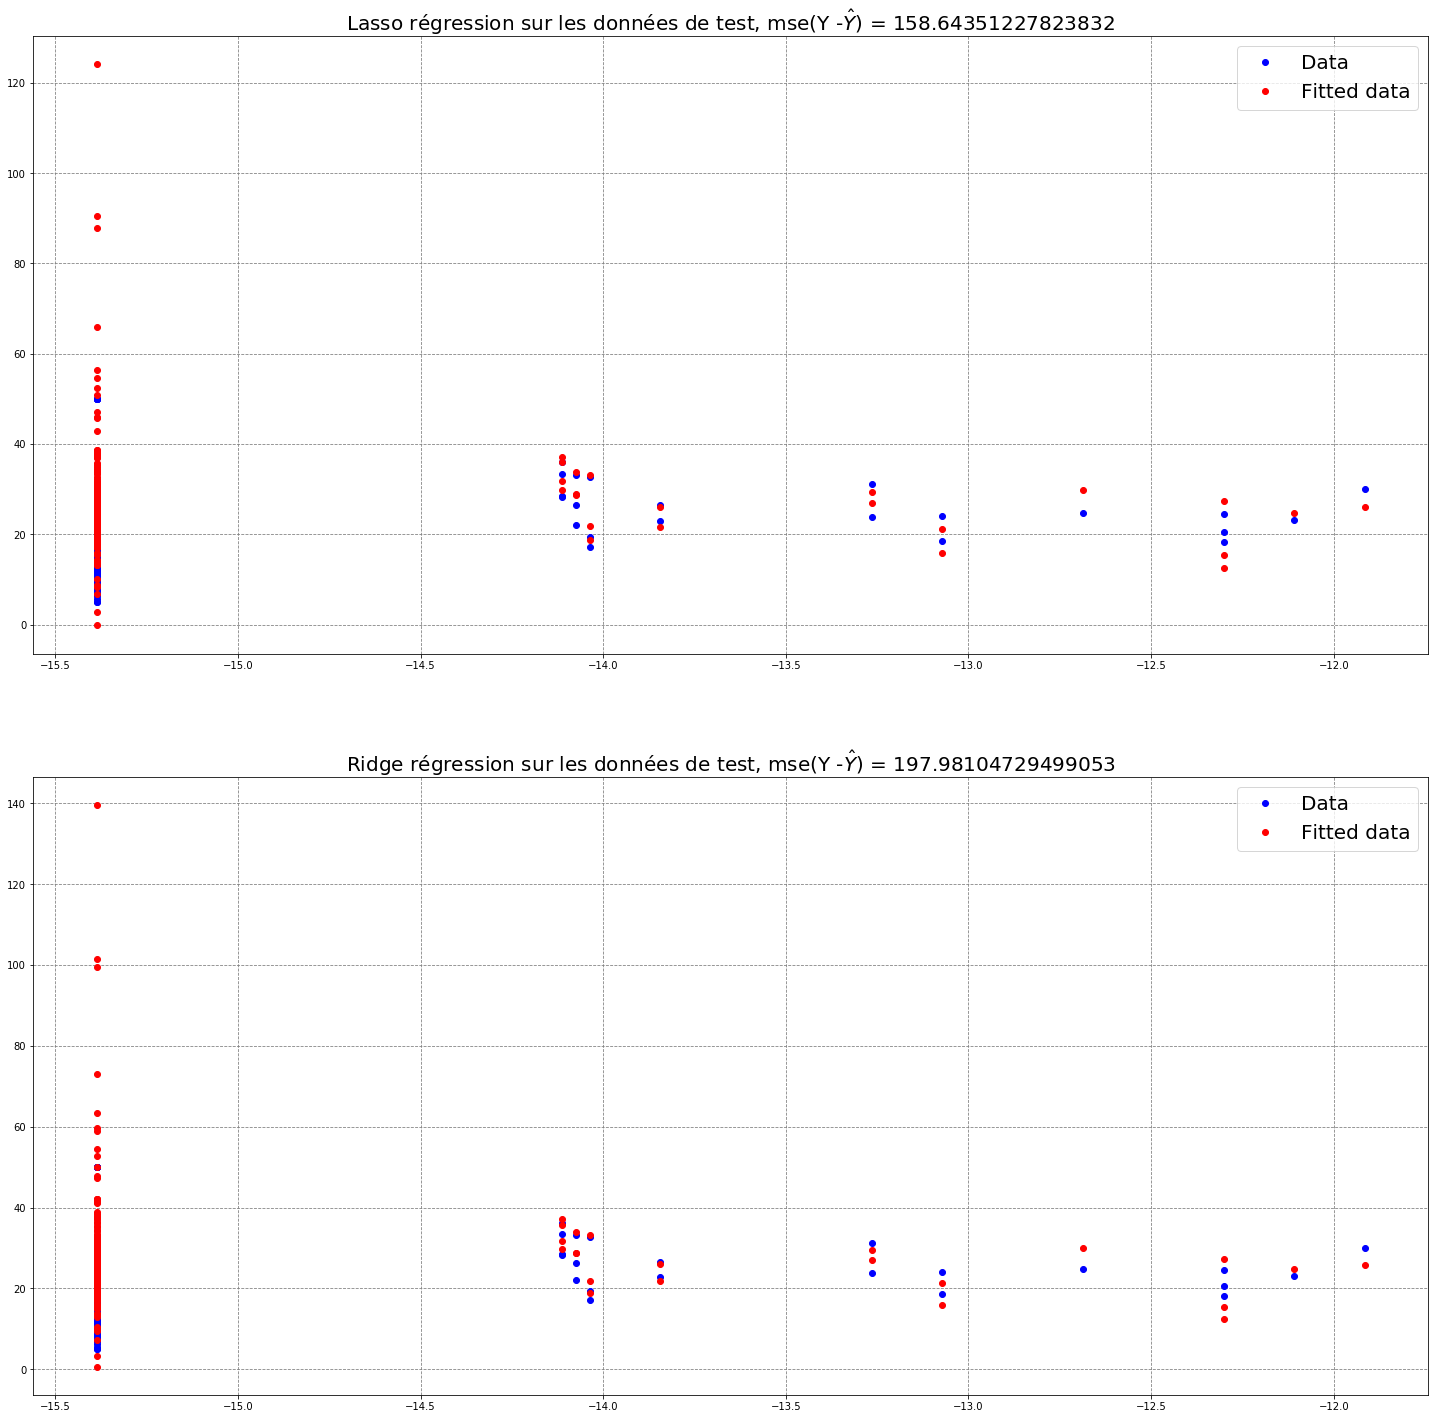

In [23]:
def question42():
    
    a = 0.01
    
    clf_l.set_params(alpha=a)
    clf_l.fit(X_BH_train_pre, Y_BH_train)
    Y_pred_Lasso = clf_l.predict(X_BH_test_pre)
    Y_pred_Ridge = predict(ridge_regress(X_BH_train_pre, Y_BH_train, a), X_BH_test_pre)
    
    ax3 = plt.subplot(211)
    ax3.plot(X_BH_test_pre[:,1] , Y_BH_test, 'bo', label='Data')
    ax3.plot(X_BH_test_pre[:,1], Y_pred_Lasso , 'ro', label='Fitted data')
    plt.title('Lasso régression sur les données de test, mse(Y -$\hat Y$) = {}'.format(mse(Y_pred_Lasso, Y_BH_test)), \
              fontsize = 20)
    ax3.legend(fontsize = 20)
    ax3.grid(color='gray', linestyle='dashed')
     
    ax4 = plt.subplot(212)
    ax4.plot(X_BH_test_pre[:,1] , Y_BH_test, 'bo', label='Data')
    ax4.plot(X_BH_test_pre[:,1], Y_pred_Ridge , 'ro', label='Fitted data')
    plt.title('Ridge régression sur les données de test, mse(Y -$\hat Y$) = {}'.format(mse(Y_pred_Ridge, Y_BH_test)), \
              fontsize = 20)
    ax4.legend(fontsize = 20)
    ax4.grid(color='gray', linestyle='dashed')
    
    plt.show()
    
question42()

In [24]:
prim = clf_l.predict(X_BH_test_pre)
prim.shape

(206,)

# 5 Classification plug-in

On considère dans cette partie un problème de classification binaire à valeur dans $Y = \{−1, +1\}$. Nous noterons $η(x) = P(y = 1 | \ x) \ et \ X = \{x^i, y^i\}^{N}_{i=1}$ l’ensemble d’apprentissage. Dans le cadre de la classification plug-in, le problème de classification est vu comme un problème de régression
aux moindres carrés : il s’agit de trouver la fonction linéaire $f_w = \sum_{i=1}^{d} w_i x_i + w_0$ qui minimise $ E[(f_w(x) − y)^2]$ (soit trouver fw qui approxime au mieux $2η(x) − 1$ ).

- Inférence : le signe de $f_w(x)$ conduit à la classification de $x : +1$ si positif, $−1$ sinon.
- Coût à optimiser : $L(w, X) = \sum_{i=1}^{N} (f_w(x) − y)^2 = \sum_{i=1}^{N} (w_0 +\sum_{j=1}^{d} w_j x_j^i− y^i)^2 $


In [25]:
def load_usps ( filename ):
    with open ( filename ,"r") as f :
        f . readline ()
        data =[ [ float ( x ) for x in l . split ()] for l in f if len ( l . split ()) >2]
    tmp = np . array ( data )
    return tmp [: ,1:] , tmp [: ,0]. astype ( int )

def show_usps ( data ):
    plt . imshow ( data . reshape ((16 ,16)), interpolation ='nearest', cmap ='gray')

In [26]:
X_USPS_train, Y_USPS_train = load_usps('USPS_train.txt')
X_USPS_test, Y_USPS_test = load_usps('USPS_test.txt')

Image 1 : 3
Image 2 : 0
Image 3 : 3
Image 4 : 6
Image 5 : 6


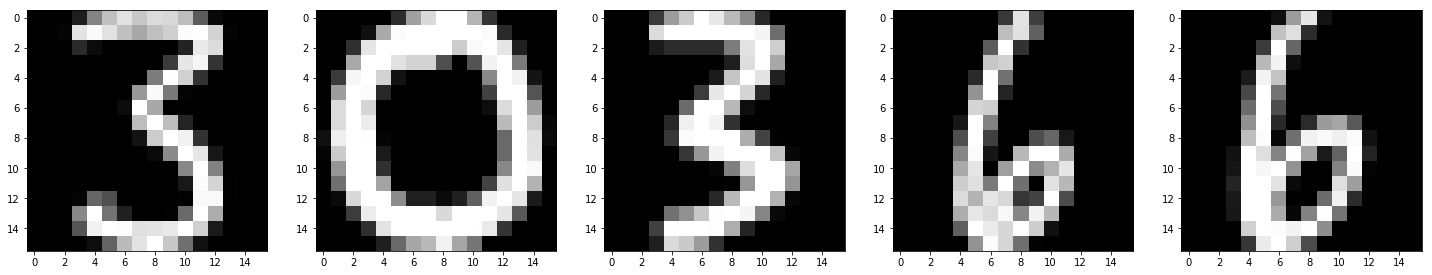

In [27]:
def question511() :
    for i in range(5):
        plt.subplot(1, 5, i+1)
        show_usps(X_USPS_train[1300+i,:])
        print("Image", i+1, ":", Y_USPS_train[1300+i])
    
question511()

#### Q 5.1.2

On veut reconnaître les images qui représentent un 3. On divise donc l'ensemble d'image en une classe composée des images qui représentent un 3, associée à $+1$, et la classe composée des autres images, associée à $-1$.

In [28]:
def error_rates(X_USPS_train, Y_USPS_train, X_USPS_test, Y_USPS_test, lmb, regress_fun):
    X_3_train = X_USPS_train
    Y_3_train = [1 if y == 3 else -1 for y in Y_USPS_train]
    X_3_test = X_USPS_test
    Y_3_test = [1 if y == 3 else -1 for y in Y_USPS_test]

    w_3 = regress_fun(X_3_train, Y_3_train, lmb)
    prediction_train = predict(w_3, X_3_train) >= 0
    prediction_test = predict(w_3, X_3_test) >= 0
    reality_train = Y_USPS_train == 3
    reality_test = Y_USPS_test == 3
    error_rate_train = round(100*sum(prediction_train != reality_train)/len(prediction_train), 1)
    error_rate_test = round(100*sum(prediction_test != reality_test)/len(prediction_test), 1)
    
    return error_rate_train, error_rate_test, w_3

error_rate_train, error_rate_test, w_3 = error_rates(X_USPS_train, Y_USPS_train, X_USPS_test, Y_USPS_test, 10, ridge_regress)

print('Error rate on train data :', error_rate_train, "%")
print('Error rate on test data :', error_rate_test, "%")


Error rate on train data : 2.1 %
Error rate on test data : 3.5 %


#### Q 5.1.3

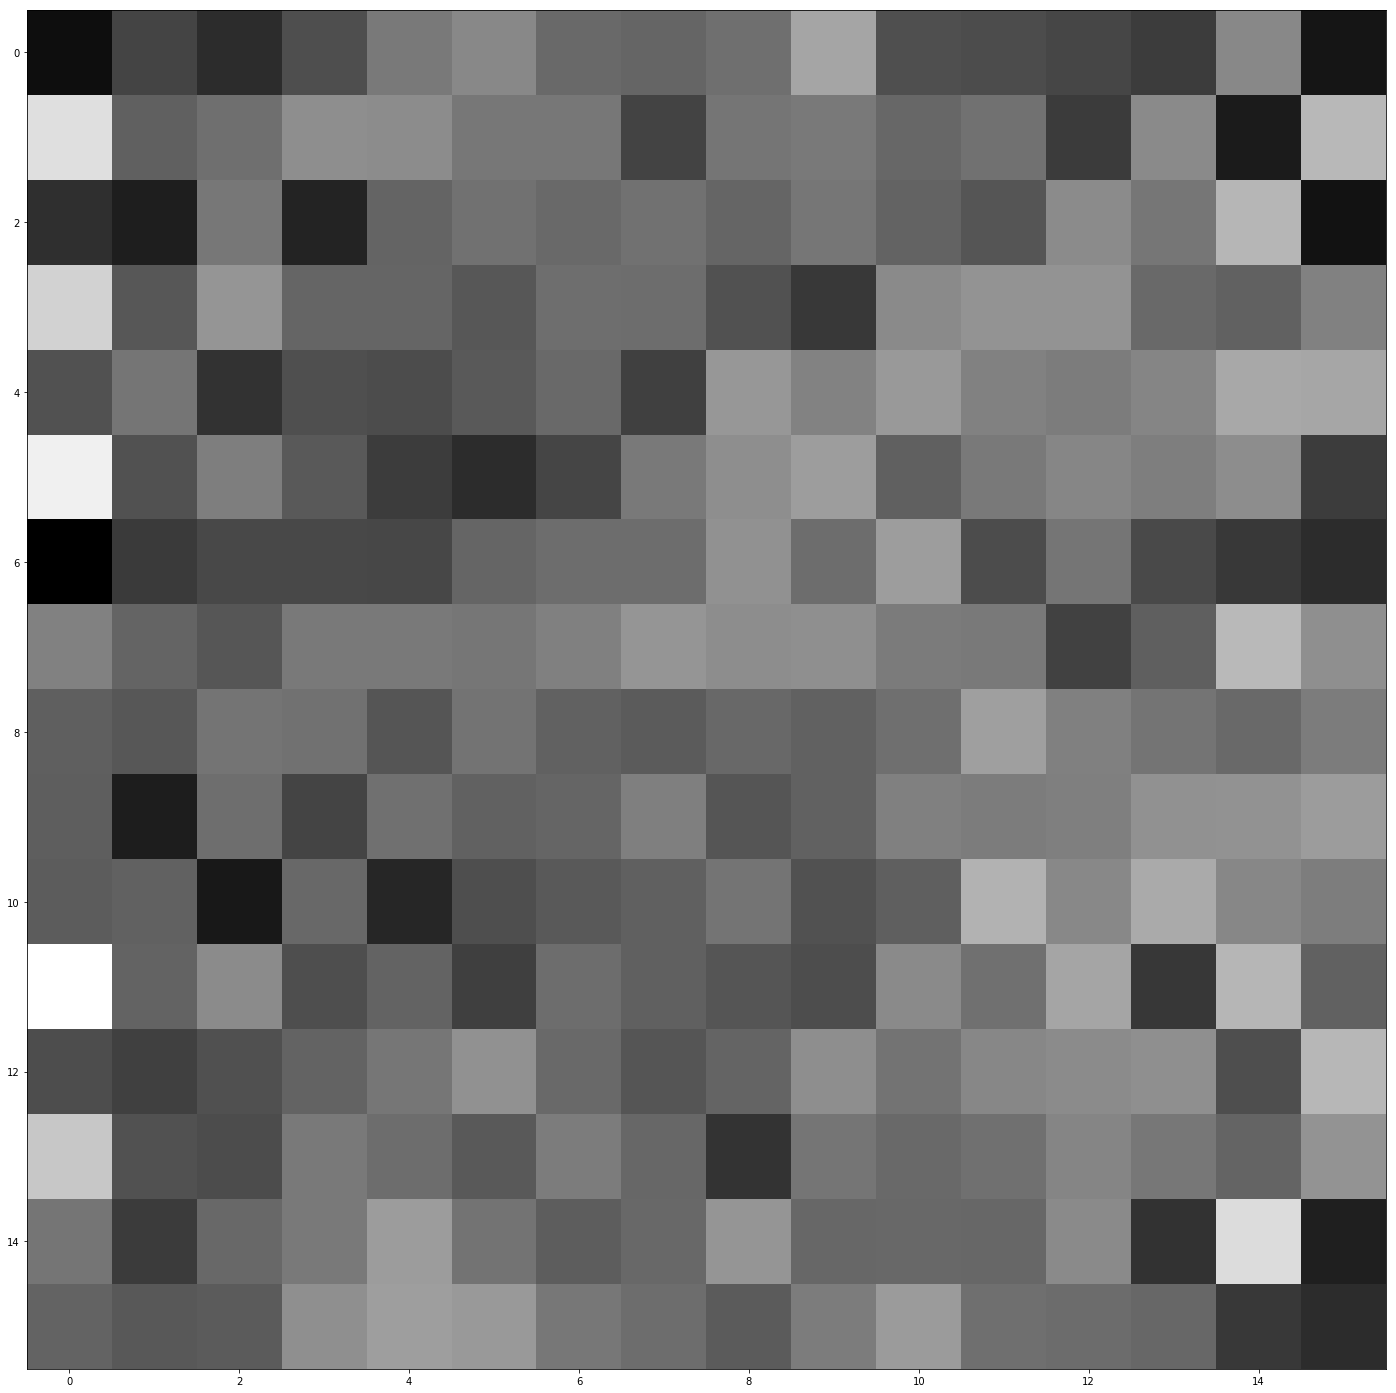

In [29]:
def question513() :
    show_usps(w_3[1:])

question513()

#### Q 5.1.4

C:\Users\13_Vi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\13_Vi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


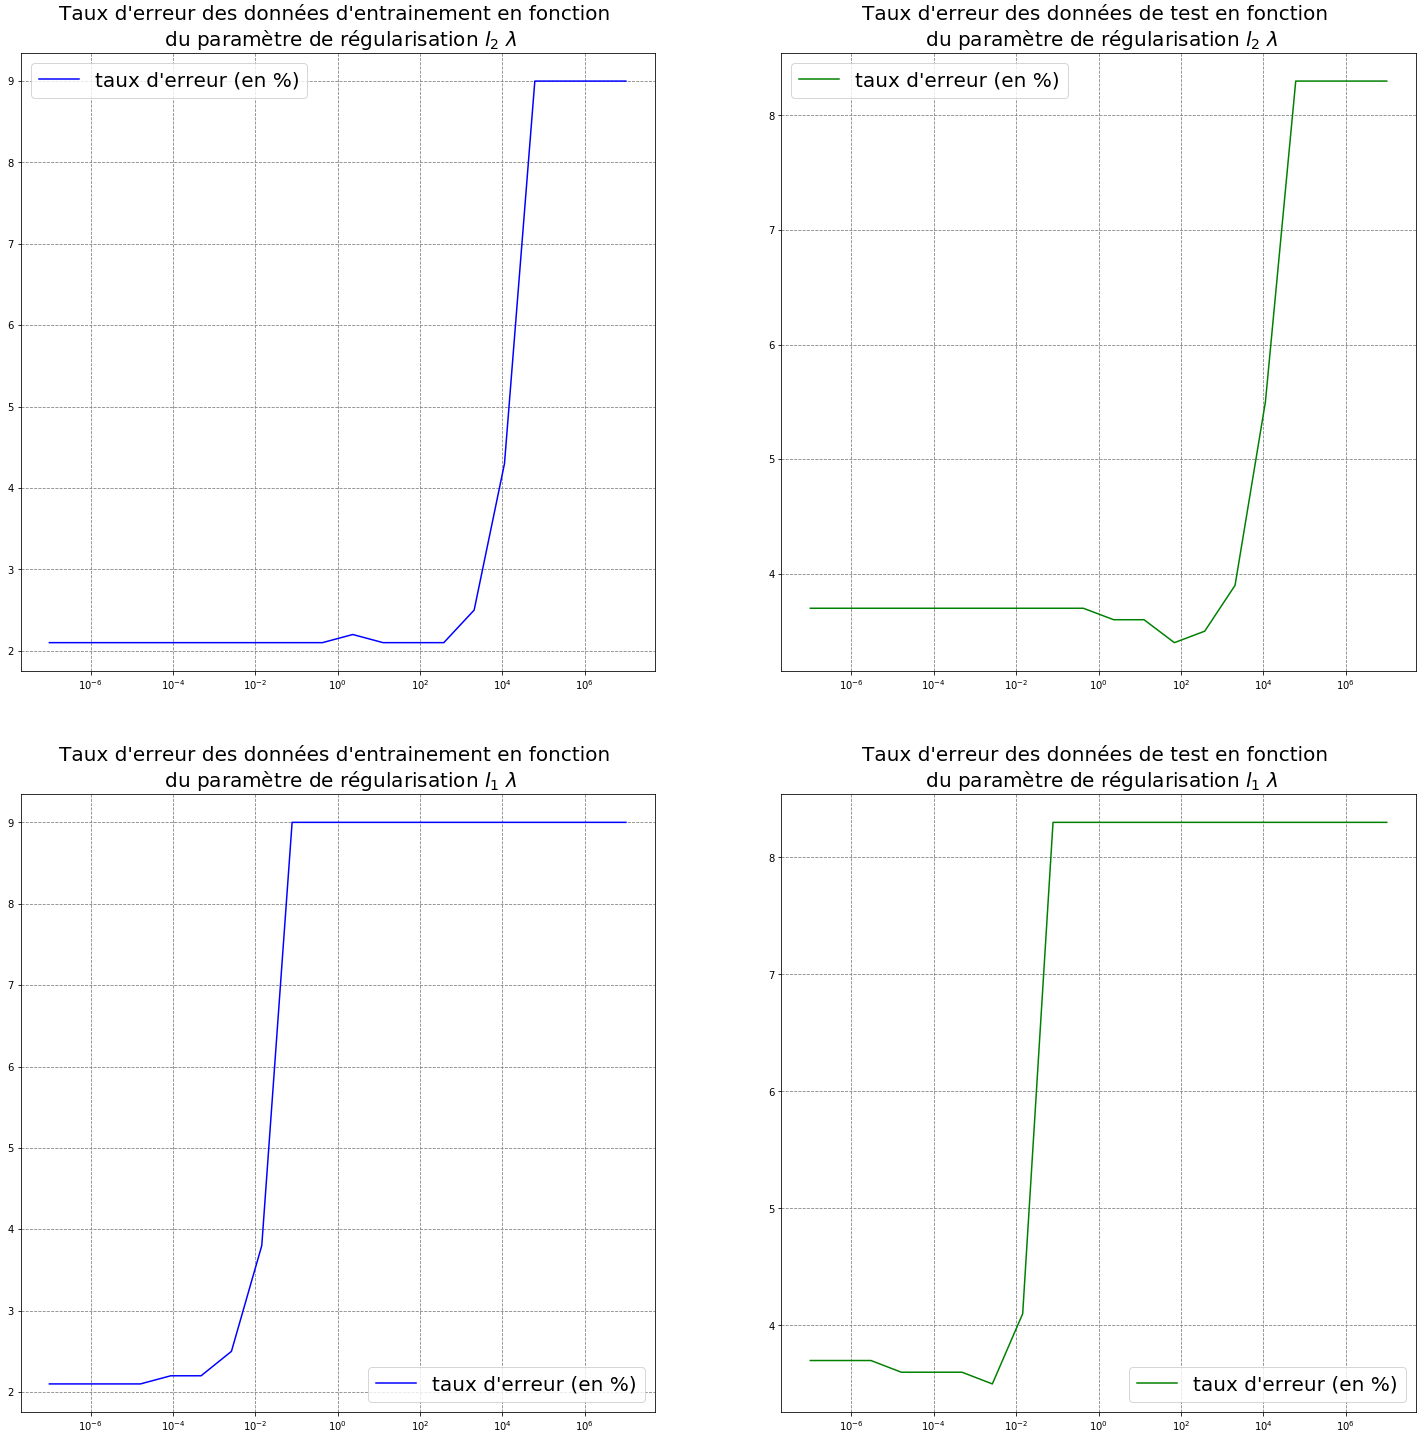

In [30]:
def lasso_regress(X, Y, lmb):
    clf_l = linear_model.Lasso(fit_intercept=True)
    clf_l.set_params(alpha=lmb)
    clf_l.fit(X, Y)
    w = [clf_l.intercept_]
    w.extend(clf_l.coef_)
    
    return np.array(w)

def question514(X_train, Y_train, X_test, Y_test):
    N = 20
    result_train_l1 = np.zeros(N)
    result_test_l1 = np.zeros(N)
    result_train_l2 = np.zeros(N)
    result_test_l2 = np.zeros(N)
    grille = np.logspace(-7, 7, N)
    
    for idx, lmb in enumerate(grille):
        error_rate_train_l2, error_rate_test_l2, _ = error_rates(X_USPS_train, Y_USPS_train, X_USPS_test, Y_USPS_test, lmb, ridge_regress)
        result_train_l2[idx] = error_rate_train_l2
        result_test_l2[idx] = error_rate_test_l2
        error_rate_train_l1, error_rate_test_l1, _ = error_rates(X_USPS_train, Y_USPS_train, X_USPS_test, Y_USPS_test, lmb, lasso_regress)
        result_train_l1[idx] = error_rate_train_l1
        result_test_l1[idx] = error_rate_test_l1
        
    

    ax1 = plt.subplot(221)
    ax1.plot(grille, result_train_l2, color='blue', label="taux d'erreur (en %)")
    ax1.set_title("Taux d'erreur des données d'entrainement en fonction \n du paramètre de régularisation $l_2$ $\lambda$", \
                 fontsize = 20)
    ax1.legend(fontsize = 20)
    ax1.grid(color='gray', linestyle='dashed')
    ax1.set_xscale('log')
    
    ax2 = plt.subplot(222)
    ax2.plot(grille, result_test_l2, color='green', label="taux d'erreur (en %)")
    ax2.legend(fontsize = 20)
    ax2.grid(color='gray', linestyle='dashed')
    ax2.set_title("Taux d'erreur des données de test en fonction \n du paramètre de régularisation $l_2$ $\lambda$", \
                 fontsize = 20)
    ax2.set_xscale('log')
    
    ax3 = plt.subplot(223)
    ax3.plot(grille, result_train_l1, color='blue', label="taux d'erreur (en %)")
    ax3.set_title("Taux d'erreur des données d'entrainement en fonction \n du paramètre de régularisation $l_1$ $\lambda$", \
                 fontsize = 20)
    ax3.legend(fontsize = 20)
    ax3.grid(color='gray', linestyle='dashed')
    ax3.set_xscale('log')
    
    ax4 = plt.subplot(224)
    ax4.plot(grille, result_test_l1, color='green', label="taux d'erreur (en %)")
    ax4.legend(fontsize = 20)
    ax4.grid(color='gray', linestyle='dashed')
    ax4.set_title("Taux d'erreur des données de test en fonction \n du paramètre de régularisation $l_1$ $\lambda$", \
                 fontsize = 20)
    ax4.set_xscale('log')

question514(X_USPS_train, Y_USPS_train, X_USPS_test, Y_USPS_test)

Les résultats sont de preformance équivalente entre les normes $l_1$ ($\alpha$ entre $10^{-3}$ et $10^{-2}$) et $l_2$ ($\lambda$ de l'ordre de $10^2$).
